# Problem 9

In [18]:
import numpy as np
N = 6
h = 1/(N-1)
'''
A = np.array([[1, -1, 0, 0, 0, 0, 0.5, 0], [-1, 2, -1, 0, 0, 0, 0, 0.5], [0, -1, 2, -1, 0, 0, 0, 0],
              [0, 0, -1, 2, -1, 0, 0, 0], [0,0,0,-1, 2, -1, 0, 0], [0,0,0,0,-1,1, 0, 0],
             [0.5,0,0,0,0,0,0,0], [0,0.5,0,0,0,0,0,0]]).T
             
A = np.array([[1000, -1, 0, 0, 0, 0], [-1, 2, -1, 0, 0, 0], [0, -1, 2, -1, 0, 0,],
              [0, 0, -1, 2, -1, 0], [0,0,0,-1, 2, -1], [0,0,0,0,-1,1000],]).T
'''

A = A = np.array([[1, -1, 0, 0, 0, 0], [-1, 2, -1, 0, 0, 0], [0, -1, 2, -1, 0, 0,],
              [0, 0, -1, 2, -1, 0], [0,0,0,-1, 2, -1], [0,0,0,0,-1,1],]).T

second_order = 2*(1/h) *A

In [19]:
second_order

array([[ 5., -5.,  0.,  0.,  0.,  0.],
       [-5., 10., -5.,  0.,  0.,  0.],
       [ 0., -5., 10., -5.,  0.,  0.],
       [ 0.,  0., -5., 10., -5.,  0.],
       [ 0.,  0.,  0., -5., 10., -5.],
       [ 0.,  0.,  0.,  0., -5.,  5.]])

In [20]:
b = np.array([[1, 1, 0,0,0,0], [1,1,1,0,0,0],[0,1,1,1,0,0], 
              [0,0,1,1,1,0],[0,0,0,1,1,1], [0,0,0,0,1,1]]).T
'''
b = np.array([[1, 1, 0,0,0,0,0,0], [1,1,1,0,0,0,0,0],[0,1,1,1,0,0,0,0], 
              [0,0,1,1,1,0,0,0],[0,0,0,1,1,1,0,0], [0,0,0,0,1,1,0,0]]).T
              
b = np.array([[1, 1, 0,0,0,0], [1,1,1,0,0,0],[0,1,1,1,0,0], 
              [0,0,1,1,1,0],[0,0,0,1,1,1], [0,0,0,0,1,1]]).T

'''
f = np.array([1, 1, 1, 1, 1, 1])
first_order = (h/4)*b@f

In [23]:
second_order

array([[ 5., -5.,  0.,  0.,  0.,  0.],
       [-5., 10., -5.,  0.,  0.,  0.],
       [ 0., -5., 10., -5.,  0.,  0.],
       [ 0.,  0., -5., 10., -5.,  0.],
       [ 0.,  0.,  0., -5., 10., -5.],
       [ 0.,  0.,  0.,  0., -5.,  5.]])

In [22]:
import cvxpy as cp
x = cp.Variable(6)

# prob = cp.Problem(cp.Minimize(cp.quad_form(x, second_order) - first_order.T @ x))
# prob.solve()

prob = cp.Problem(cp.Minimize(cp.quad_form(x, second_order) - first_order.T @ x), [x[0] ==0, x[5]==0])
prob.solve()
x.value

array([4.67455741e-25, 3.00000000e-02, 4.50000000e-02, 4.50000000e-02,
       3.00000000e-02, 1.16868218e-25])

In [27]:
import pandas as pd

x_val = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
temp_value = list(map(lambda x: 0.5*x*(1-x), [0, 0.2, 0.4, 0.6, 0.8, 1.0]))
plot_df = pd.DataFrame({"Location On the Bar": x_val, 'Temperature': temp_value})

import plotly.express as px

fig = px.line(plot_df, x="Location On the Bar", y="Temperature", title='Real Temperature Distribution')
fig.show()

# Problem 12

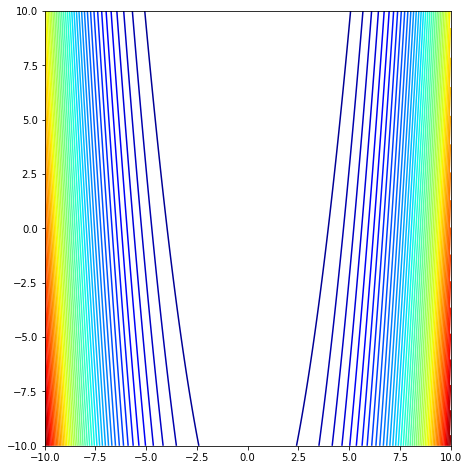

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
X1 = np.linspace(-10, 10, 1000)
X2 = np.linspace(-10, 10, 1000)
 
x1, x2 = np.meshgrid(X1, X2)
Z = 10*(x2 - x1**2)**2 + (1-x1)**2

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 2)
ax.contour(x1, x2,Z, 50, cmap = 'jet')

In [178]:
import sympy as sym
x0 = sym.Symbol('x0')
x1 = sym.Symbol('x1')
phi_1 = 10*(x1 - x0**2)**2 + (1-x0)**2
phi_1_x0 = phi_1.diff(x0)
phi_1_x0.diff(x1)

phi_1_x1 = phi_1.diff(x1)
phi_1_x1.diff(x1)

-40*x0

In [200]:
def objective_function(x):
    return 10*(x[1] - x[0]**2)**2 + (1-x[0])**2

def jacobian(x):
    return np.array([-40*x[0]*(-x[0]**2 + x[1])+2*x[0]-2, -20*x[0]**2 + 20*x[1]])

def hessian(x):
    return np.array([[120*x[0]**2-40*x[1]+2,-40*x[0]],
                     [-40*x[0], 20]])

f_x = lambda x: -40*x[0]*(-x[0]**2 + x[1])+2*x[0]-2
f_y = lambda x: -20*x[0]**2 + 20*x[1]
f_xx = lambda x: 120*x[0]**2-40*x[1]+2
f_xy = lambda x: -40*x[0]
f_yy = lambda x: 20

In [215]:
def quadratic_approx(x, x_0 = [0,-1]):
    return objective_function(x_0) + f_x(x_0)*(x[0] - x_0[0]) +\
           f_y(x_0)*(x[1] - x_0[1]) + 0.5*f_xx(x_0)*(x[0] - x_0[0])**2 +\
           f_xy(x_0)*(x[0] - x_0[0])*(x[1] - x_0[1]) +\
           0.5*f_yy(x_0)*(x[1] - x_0[1])**2

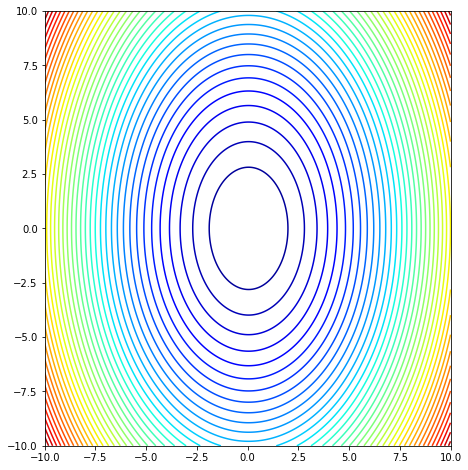

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
X1 = np.linspace(-10, 10, 1000)
X2 = np.linspace(-10, 10, 1000)
 
x1, x2 = np.meshgrid(X1, X2)
Z = quadratic_approx(x=[x1, x2])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 2)
ax.contour(x1, x2,Z, 50, cmap = 'jet')

## Part b

In [218]:
import numpy as np
import scipy as sp

def trust_region(obj_func, jac, hess, x0, delta_0, niter= 100):

    delta_ = delta_0
    lambda_ = 0
    identy_matrix = np.eye(len(x0))
    d_lambda = np.array([0,0])
    hessian = hess(x0)
    gradient = jac(x0)
    L= np.linalg.cholesky(hessian)
    for i in range(niter):
        d_lambda = -np.linalg.inv(hessian + lambda_*identy_matrix) @ gradient
        d_lambda_norm = np.linalg.norm(d_lambda)
        print(d_lambda_norm)
        if 0.75*delta_0 <= d_lambda_norm <= 1.5*delta_0:
            break
        else:
            w= np.linalg.inv(L) @ d_lambda
            lambda_ += (1 - (d_lambda_norm)/(delta_))*(-d_lambda_norm**2/(w.T @ w))
    return np.round(d_lambda, 3)

In [221]:
def objective_function(x):
    return 10*(x[1] - x[0]**2)**2 + (1-x[0])**2

def jacobian(x):
    return np.array([-40*x[0]*(-x[0]**2 + x[1])+2*x[0]-2, -20*x[0]**2 + 20*x[1]])

def hessian(x):
    return np.array([[120*x[0]**2-40*x[1]+2,-40*x[0]],
                     [-40*x[0], 20]])

trust_region(obj_func=objective_function, jac=jacobian, 
             hess=hessian, x0=np.array([0,-1]), 
             delta_0=1.25)

1.001133144839459


array([0.048, 1.   ])

## Part c

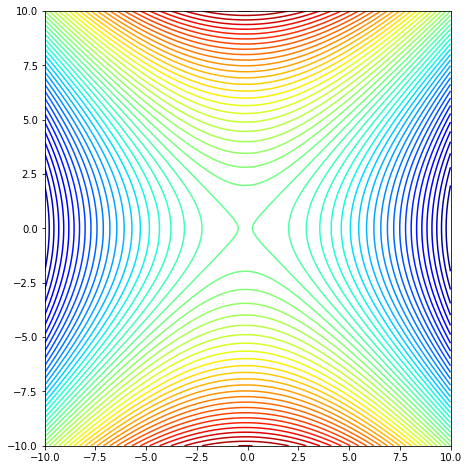

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
X1 = np.linspace(-10, 10, 1000)
X2 = np.linspace(-10, 10, 1000)
 
x1, x2 = np.meshgrid(X1, X2)
Z = quadratic_approx(x=[x1, x2], x_0=(0, 0.5))

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 2)
ax.contour(x1, x2,Z, 50, cmap = 'jet')

In [227]:
hessian([0,0.5])

array([[-18.,   0.],
       [  0.,  20.]])

In [224]:
trust_region(obj_func=objective_function, jac=jacobian, 
             hess=hessian, x0=np.array([0,0.5]), 
             delta_0=1.25)

LinAlgError: Matrix is not positive definite

# Problem 13

In [108]:
A = np.array([[2, -1, 0],[-1, 2, -1],[0, -1, 2]])
b = np.array([0,0,0])
x0 = np.array([0.0,1.0,2.0])

In [109]:
def hscg(A, b, x0, niter = 1000, tol= 1e-6):
    """
    This is the Python implementation CG-Algorithm via exact line search
    
    A, numpy array, is the A matrix in the decomposition
    b, numpy array, is the b matrix in the decomposition
    x0 is the initial point of the algorithm
    niter is the number of iterations, default is 1000
    """
    x_ = x0
    gk_ = A @ x_ + b
    d_ = -gk_
    for iteration in range(niter):
        print(np.round(x_, 3))
        lambda_ = (- gk_@ d_)/(d_ @ A @d_)
        if (np.abs(gk_) <= tol).all() :
            # break
            return x_
        else:
            x_ += lambda_*d_
            gk1_ = A @ x_ + b
            gamma_k1 = (gk1_ @ gk1_)/(gk_ @ gk_)
            d_ = -gk1_ + gamma_k1*d_
            gk_ = gk1_
    return x_

In [110]:
hscg(A, b, x0)

[0. 1. 2.]
[0.5 1.  0.5]
[0.556 0.444 0.333]
[0. 0. 0.]


array([1.11022302e-16, 5.55111512e-17, 0.00000000e+00])

In [105]:
from scipy.optimize import minimize
myfunc = lambda x: x[0]**2 + x[1]**2 + x[2]**2 - x[0]*x[1] - x[1]*x[2]
minimize(myfunc, [0,1,2], method='Powell', tol=1e-6)

   direc: array([[-2.67397353e-01, -3.16500927e-01, -1.58250464e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-6.11316520e-04,  6.43568822e-04,  3.21784415e-04]])
     fun: 2.1775509271022898e-23
 message: 'Optimization terminated successfully.'
    nfev: 199
     nit: 6
  status: 0
 success: True
       x: array([-9.97465999e-18, -1.16009632e-17,  4.66641781e-12])

# Problem 15

## Part 3

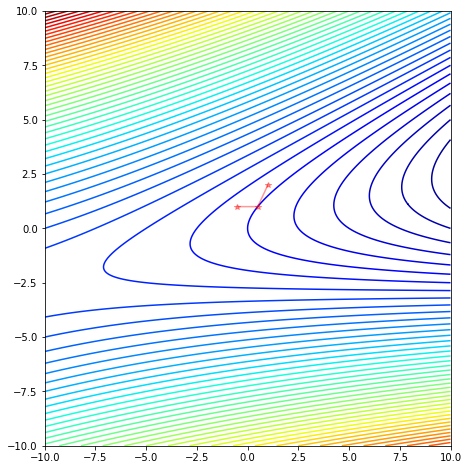

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
X1 = np.linspace(-10, 10, 1000)
X2 = np.linspace(-10, 10, 1000)
 
X,Y = np.meshgrid(X1, X2)
Z = -12*X + 4*Y**2 + 4*Y**2 - 4*X*Y

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 2)
# ax = plt.axes()
#ax.plot_surface(X1, X2, Y,
#                cmap='binary')
ax.contour(X,Y,Z, 50, cmap = 'jet')

iter_x = [-0.5,0.5,1]
iter_y = [1, 1, 2]
# iter_z = [10,20,30]
ax.plot(iter_x, iter_y, color = 'r', marker = '*', alpha = .4)

# Problem 18

In [53]:
import numpy as np
import scipy as sci
import math

In [82]:
t_i = np.array([1, 2, 4, 5, 8])
y_i = np.array([3, 4, 6, 11, 20])
def F(x):
    return x[0]*np.exp(t_i*x[1]) - y_i

f_x = lambda x: 0.5*F(x).T@F(x)

gradient_first_line = lambda x: np.exp(x[1]*t_i)
gradient_second_line = lambda x: x[0]*t_i*np.exp(x[1]*t_i)

def jacobian(x1):
    return np.array([gradient_first_line(x1),
                     gradient_second_line(x1)]) @ F(x1)

def hessian(x):
    temp_mat = np.array([gradient_first_line(x), gradient_second_line(x)])
    intial = temp_mat @ temp_mat.T
    
    for i in range(len(t_i)):
        intial += (x[0]*np.exp(x[1]*t_i[i]) - y_i[i])*np.array([[0, t_i[i]*np.exp(x[1]*t_i[i])],
                                                      [t_i[i]*np.exp(x[1]*t_i[i]), x[0]*(t_i[i]**2)*np.exp(x[1]*t_i[i])]])
    return intial

In [89]:
x0 = [3, 0.5]
search_method = ['Newton-CG', 'trust-ncg', 'trust-exact', 'trust-krylov']
import scipy as sci
all_res = []
from scipy.optimize import minimize
for method_ in search_method:
    print(method_)
    res_list = [method_]
    nelder = sci.optimize.minimize(myfun, x0, method=method_, tol=1e-6, 
                                   jac=jacobian, hess=hessian)
    res_list.append(np.round(nelder.nit, 3))
    res_list.extend(np.round(nelder.x, 3))
    res_list.append(np.round(nelder.fun, 3))
    all_res.append(res_list)

Newton-CG
trust-ncg
trust-exact
trust-krylov


In [85]:
import pandas as pd 
pd.DataFrame(all_res)

0   1      2     3      4
0     Newton-CG  14  2.541  0.26  2.247
1     trust-ncg  15  2.541  0.26  2.247
2   trust-exact  21  2.541  0.26  2.247
3  trust-krylov  14  2.541  0.26  2.247

In [124]:
import pandas as pd
pd.DataFrame(all_res).to_csv("problem18_part2.csv")

## Part 2

### Least Squares Approach

In [86]:
import scipy as sci
import numpy as np
from scipy.optimize import curve_fit

x0 = np.array([3, 0.5])
least_square_1 = sci.optimize.least_squares(f_x, x0, method='dogbox')
print(least_square_1)

least_square_2 = sci.optimize.least_squares(f_x, x0, method='trf')
print(least_square_2)

least_square_3 = sci.optimize.least_squares(f_x, x0, method='lm')
print(least_square_3)

 active_mask: array([0, 0])
        cost: 3.8204787523819475
         fun: array([2.76422819])
        grad: array([7.11364919, 9.33957372])
         jac: array([[2.57346669, 3.37872747]])
     message: 'The maximum number of function evaluations is exceeded.'
        nfev: 200
        njev: 177
  optimality: 9.339573718708408
      status: 0
     success: False
           x: array([2.95436557, 0.23911796])
 active_mask: array([0., 0.])
        cost: 10.339500063201902
         fun: array([4.54741686])
        grad: array([ 21.10759845, -11.52083109])
         jac: array([[ 4.6416678 , -2.53348911]])
     message: 'The maximum number of function evaluations is exceeded.'
        nfev: 200
        njev: 193
  optimality: 21.10759844652107
      status: 0
     success: False
           x: array([3.44669611, 0.21754172])


ValueError: Method 'lm' doesn't work when the number of residuals is less than the number of variables.

## Part 3

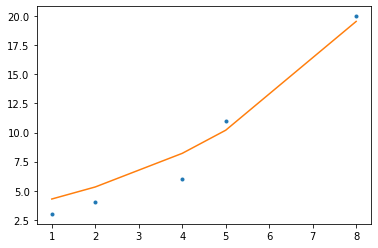

In [97]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Sample data
t_i
y_i

plt.plot(t_i, y_i, '.')
plt.plot(t_i, 3.446*np.exp( 0.217*t_i), '-')
plt.show()